# Lab Assignment 4

## Your Name, s1234567



## Task 1 (5 marks)

Give your implementation of the `plot_approx` and `approx_fourier` functions from Lab 4.

Use them to produce a plot of a Fourier series approximation of the function defined by

$$
f(x)=\left\{\begin{array}{ll}
-\frac{1}{2} x & -2 \leq x<0 \\
2 x-\frac{1}{2} x^2 & 0 \leq x<2
\end{array} \quad f(x+4)=f(x)\right.
$$

using the first 10 terms of the Fourier series.

Also include a piecewise plot of $f(x)$ for a single interval of periodicity.

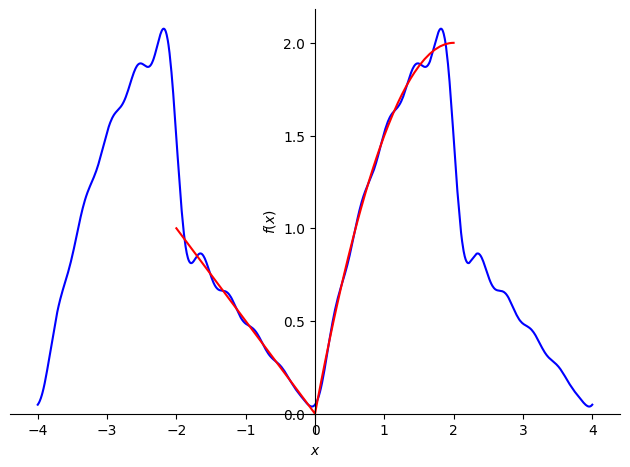

In [2]:
import sympy as sym
import sympy.plotting as sym_plot
def approx_fourier(f, L, num_terms):

    x = sym.symbols('x')
    n = sym.symbols('names=')
    
    a0 = sym.Rational(1,L)*sym.integrate(f, (x, -L, L))
    an = sym.Rational(1,L)*sym.integrate(f * sym.cos(n * sym.pi * x/L), (x, -L, L))
    bn = sym.Rational(1,L)*sym.integrate(f * sym.sin(n*sym.pi*x/L), (x, -L, L))
    f_approx = a0/2 + sym.Sum(an*sym.cos(n * sym.pi * x/L)+bn * sym.sin(n * sym.pi * x/L), (n,1,num_terms))
    return f_approx.doit()


def plot_approx(f, L, num_terms):

    f_approx = approx_fourier(f, L, num_terms)
    f_plot = sym_plot.plot((f_approx,(x,-2*L,2*L)), (f,(x,-L,L)), show  = False)
    f_plot[0].line_color = "blue"
    f_plot[1].line_color = "red"
    return f_plot

x = sym.symbols('x')
f = sym.Piecewise((-x/2, (x < 0) & (x >= -2)), (2*x-x**2/2, (x >= 0) & (x < 2)))


plot_approx(f, 2, 10).show()


## Task 2 (5 marks)

Solve Exercise $3.1$ from Lab 4 , but with the initial condition

$$
u(x, 0)=f(x)= \begin{cases}1 & L / 2-1<x<L / 2+1 \\ 0 & \text { otherwise. }\end{cases}
$$

Note that to ensure the code runs in reasonable time, you should use $L=10$ and run the animation for $0 \leq t \leq 20$, with only 2 frames per second. You should use at least 200 terms of the series solution in order to obtain a good approximation.
Describe the behaviour of the solution.

In [41]:
# Your code here for (a)

### BEGIN SOLUTION
import matplotlib.pyplot as plt 
import numpy as np
import matplotlib.animation as animation
import sympy as sym
from IPython.display import HTML

x = sym.symbols('x')
n = sym.symbols('n')
t = sym.symbols('t')

L = 10 # length of the string
a = 1 # speed of the wave. It is a parameter of the problem

# This is the initial condition
f = sym.Piecewise((1, (x > L/2-1)&(x < L/2 +1)), (0, True))
# calculate the coefficients of the solution. It is a function of n
cn = sym.Rational(2,L)*sym.integrate(f*sym.sin(n*sym.pi*x/L), (x, 0, L))
# calculate the solution
u_symbolic = sym.Sum(cn.simplify()*sym.sin(n*sym.pi*x/L)*sym.cos(n*sym.pi*a*t/L), (n,1,200))
# convert the solution to a function that can be evaluated numerically
u = sym.lambdify([x, t], u_symbolic, modules='numpy')

## Animation
fps = 2 # number of frames per second
x_vals = np.linspace(0,L,200)
fig, ax = plt.subplots()
# set up the initial frame
line, = ax.plot(x_vals, u(x_vals,0), 'k-')
plt.plot(x_vals,u(x_vals,0),'r:')
plt.xlabel('x')
plt.ylabel('u')
plt.ylim(-1.2,1.2)
plt.close()
# add an annotation showing the time (this will be updated in each frame)
txt = ax.text(0, 0.9, 't=0')

# dummy function for animation
def init():
    line.set_ydata(u(x_vals,0))
    return line,

# dummy function for animation
# the argument i is the frame number
def animate(i):
    line.set_ydata(u(x_vals,i/fps))  # update the data
    txt.set_text('t='+str(i/fps)) # update the annotation
    return line, txt

ani = animation.FuncAnimation(fig, animate, np.arange(1, fps*20), init_func=init,
                              interval=1000/fps, blit=True, repeat=False)

### END SOLUTION

In [42]:
HTML(ani.to_jshtml())

Description of behaviour:

The solution of the problem behaves like the propogation of square wave in a elastics string: which is exactly what we expected.

The square wave are split in two halves and travel in opposite direction with constant speed. The wave interfere with each other following the principle of supercomposition. 

## Submission instructions

After producing the animation (as in the lab), you should also use the following line of code to produce an mp4 file of your animation. The file should then appear alongside the .ipynb file in your Jupyter file list. Note, if you are not using noteable, you will need to install ffmpeg. You can see this page for instructions https://ffmpeg.org/.

In [ ]:
ani.save('hdeq_lab4_task2.mp4', writer='ffmpeg', fps=20)

Alternatively, you can use the code 

In [ ]:
ani.save('hdeq_lab4_task2.gif', writer='Pillow ', fps=20)

To save the simulation as a gif. Upload four files on gradsecope the .pdf, the .ipynb, the .py and the .mp4 (or .gif).